In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

1.4 Pandas, DataFrames, нет, панды тут ни при чем

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1.5 Фильтрация данных

In [7]:
st_perf = pd.read_csv('StudentsPerformance.csv')
st_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
st_perf[st_perf['lunch'] == 'free/reduced'].shape[0] / st_perf.shape[0]

0.355

In [138]:
st_perf[st_perf['lunch'] == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [136]:
st_perf[st_perf['lunch'] == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [139]:
st_perf[st_perf['lunch'] == 'standard'].describe() - st_perf[st_perf['lunch'] == 'free/reduced'].describe()

,math score,reading score,writing score
count,290.000000,290.000000,290.000000
mean,11.112982,7.000742,7.800721
std,-1.506455,-1.064737,-1.094336
min,19.000000,9.000000,12.000000
25%,12.000000,7.000000,9.000000
50%,9.000000,7.000000,8.000000
75%,11.000000,7.000000,7.000000
max,0.000000,0.000000,0.000000


1.6 Группировка и агрегация 

In [15]:
dota2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
dota2.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [16]:
dota2.groupby('legs').size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [17]:
loopa_poopa = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
loopa_poopa.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [20]:
loopa_poopa.groupby(['Executor','Type'])['Salary'].mean()

Executor  Type
Loopa     A        58.000000
          B       145.166667
          C       154.333333
          D       137.714286
          E       164.000000
          F       238.000000
Pupa      A       160.833333
          B        77.000000
          C        74.500000
          D       146.500000
          E       131.200000
          F       136.250000
Name: Salary, dtype: float64

In [24]:
dota2.groupby(['attack_type', 'primary_attr']).size().max()

40

In [26]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [31]:
mean_concentrations = concentrations.groupby('genus').mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [ ]:
concentrations[concentrations['genus'] == 'Fucus']['alanin'].max()

In [44]:
concentrations.groupby('group')['citrate'].var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

1.7 Визуализация

In [46]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


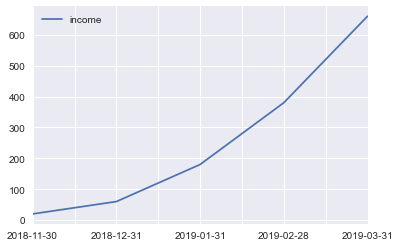

In [56]:
sns.lineplot(x=df.index, y=df.income)

In [71]:
dota2['number_roles'] = dota2.apply (lambda row: len(list(row['roles'].split(', '))), axis=1)

In [72]:
dota2.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,number_roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


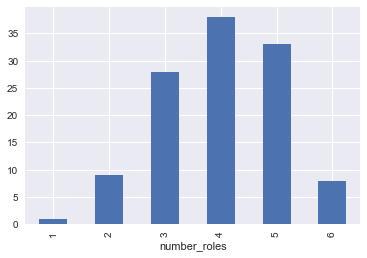

In [82]:
dota2.groupby('number_roles').size().plot(kind='bar')

In [79]:
dota2['number_roles'].unique()

array([3, 4, 5, 2, 6, 1], dtype=int64)

In [144]:
df = pd.read_csv('dataset_209770_6.txt', sep=' ')
df.head()

,x,y
0,1091.657033,1212.660631
1,1085.965162,1190.447205
2,217.930852,1004.675523
3,204.629343,994.552985
4,1083.424740,1196.004254


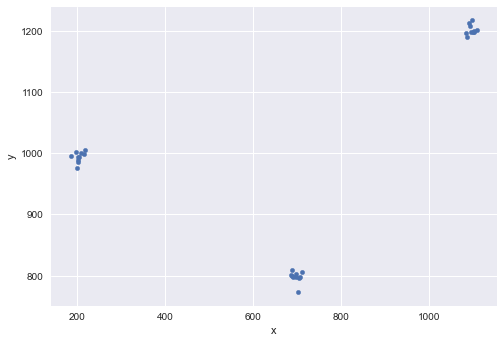

In [147]:
df.plot.scatter(x='x', y='y')

1.8 Практические задания

In [84]:
my_data = pd.DataFrame({'type':['A', 'A','B','B'], 'value':[10, 14, 12, 23]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [109]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [95]:
subset_1 = my_stat.iloc[:10, [0,2]]
subset_2 = my_stat.iloc[~my_stat.index.isin([0,4]), [1,3]]

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [101]:
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [107]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [110]:
my_stat.columns = ['session_value', 'group', 'time', 'n_users']
my_stat.head()

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [127]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat['session_value'] = my_stat['session_value'].fillna(0)
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [128]:
my_stat['n_users'] = my_stat['n_users'].apply (lambda x: my_stat[my_stat['n_users'] >= 0]['n_users'].mean() if x < 0 else x)
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9.000000
1,0.0,11,A,5.571429
2,1.0,8,A,1.000000
3,2.0,9,B,3.000000
4,2.0,10,B,9.000000


In [133]:
mean_session_value_data = my_stat.groupby('group', as_index=False).agg(
    {'session_value': 'mean'}).rename(columns={'session_value':'mean_session_value'})

,group,mean_session_value
0,A,0.8
1,B,0.8


In [131]:
my_stat.groupby('group').agg({'session_value': 'mean'})

,session_value
group,
A,0.8
B,0.8
